In [236]:
import os
import torch
import pandas as pd

In [242]:
class EpilepsyDataset:
    def __init__(self, path_to_data: str):
        self.path = path_to_data
        self.folders_with_patients = os.listdir(self.path)
        
        self.patients_data = []
        for patient in self.folders_with_patients:
            self.patients_data.append(os.listdir(os.path.join(self.path + patient)))
        
    def get_patients_data(self):
        return self.patients_data
    
    def _get_sorted_segments(self, sensor_folder: str) -> list[list]:
        """
        Get types of sensors from folder and sort its data by number of segment
        """
        
        delimeter = '_'
        sensors_files_names = list(map(lambda x: x.split(delimeter), 
                                       os.listdir(os.path.join(self.path + sensor_folder))))   
        
        cropped_sensors_files_names = list(map(lambda x: x[:-2], sensors_files_names))
        
        index_of_parameters = 3
        unique_parameters = list(set(map(lambda x: x[index_of_parameters], cropped_sensors_files_names)))
    
        return_data = []
        for unique_item in unique_parameters:
            data = list(filter(lambda x: True if unique_item in x else False, sensors_files_names))
            
            index_of_segmens_number = 5
            sorted_list = sorted(data, key=lambda x: int(x[index_of_segmens_number].split('.')[0]))
            return_data.append(list(map(lambda x: delimeter.join(x), sorted_list)))
        
        return return_data 
 

In [243]:
dataset = EpilepsyDataset('/workspace/data_seerpy/data_seerpy/data/')

dataset._get_sorted_segments('MSEL_00172/Empatica-ACC/')

,time,data
0,1.556308e+12,-4.499115e+10
1,1.556308e+12,-4.474488e+10
2,1.556308e+12,-4.449386e+10
3,1.556308e+12,-4.424286e+10
4,1.556308e+12,-4.399183e+10
...,...,...
20995,1.556560e+12,1.084900e+07
20996,1.556560e+12,1.084900e+07
20997,1.556560e+12,1.084900e+07
20998,1.556560e+12,1.084900e+07


In [146]:
import pyarrow as pa
import pyarrow.parquet as pq

import matplotlib.pyplot as plt
%matplotlib inline

schema = pa.schema([("time", "float64"), ("data", "float32")])

df = pd.read_parquet('/workspace/data_seerpy/data_seerpy/data/MSEL_00172/Empatica-TEMP/MSEL_00172_Empatica-TEMP_TEMP_segment_80.parquet', schema=schema)

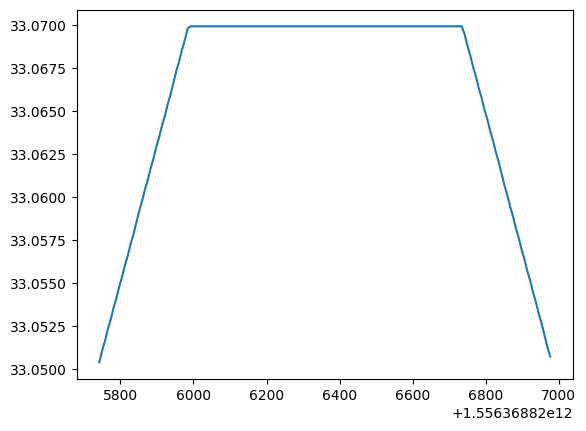

In [147]:
import numpy as np
x = np.array(df['time'])
y = np.array(df['data'])

plt.plot(x, y)
plt.show()